In [1]:
# libraries

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob

import matplotlib.pyplot as plt

In [2]:
# e-size all the images to [224,224]

IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [3]:
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)


In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layer in vgg19.layers :
    layer.trainable = False

In [6]:
# number of output classes

folders = glob('Dataset/Train/*')

folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [7]:
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [9]:
# create a model object

model = Model(inputs = vgg19.input, outputs = prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# Create Model from scratch using CNN

from tensorflow.keras.layers import MaxPooling2D

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/home/yuvanshankar/.conda/envs/malaria_detection/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 125s 10s/step - loss: 1.6756 - accuracy: 0.5307 - val_loss: 0.8432 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 140s 11s/step - loss: 0.7951 - accuracy: 0.6180 - val_loss: 0.6701 - val_accuracy: 0.6269
Epoch 3/50
13/13 [==============================] - 141s 11s/step - loss: 0.3854 - accuracy: 0.8301 - val_loss: 0.4505 - val_accuracy: 0.7761
Epoch 4/50
13/13 [==============================] - 145s 11s/step - loss: 0.3348 - accuracy: 0.8671 - val_loss: 0.4101 - val_accuracy: 0.8433
Epoch 5/50
13/13 [==============================] - 245s 20s/step - loss: 0.3180 - accuracy: 0.8475 - val_loss: 0.4170 - val_accuracy: 0.8582
Epoch 6/50
13/13 [==============================] - 139s 11s/step - loss: 0.3308 - accuracy: 0.8580 - val_loss: 0.4633 - val_accuracy: 0.7313
Epoch 7/50
13/13 [==============================] - 130s 10s/step - loss: 0.3005 - accuracy: 0.8684 - val_loss: 0.3841 - val_accuracy: 0.8433
Epoch 

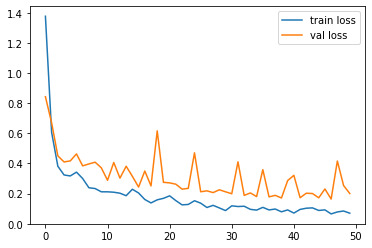

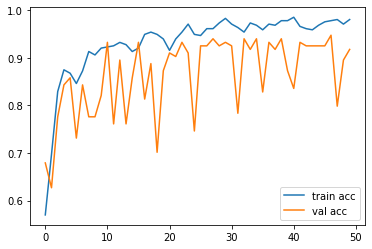

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h50')


INFO:tensorflow:Assets written to: model_vgg19.h50/assets


In [20]:
y_pred = model.predict(test_set)

y_pred

array([[2.93950923e-02, 9.70604897e-01],
       [7.50536859e-01, 2.49463171e-01],
       [5.51689463e-03, 9.94483054e-01],
       [9.99996662e-01, 3.33784510e-06],
       [9.99913573e-01, 8.64124158e-05],
       [6.95885479e-01, 3.04114491e-01],
       [9.99800265e-01, 1.99756760e-04],
       [1.71765946e-02, 9.82823372e-01],
       [9.40940753e-02, 9.05905902e-01],
       [9.99984980e-01, 1.49718253e-05],
       [3.07576843e-02, 9.69242334e-01],
       [1.39524555e-02, 9.86047506e-01],
       [1.97609086e-02, 9.80239093e-01],
       [6.16360486e-01, 3.83639514e-01],
       [9.99999523e-01, 4.31149374e-07],
       [1.93239469e-02, 9.80676055e-01],
       [7.62248158e-01, 2.37751842e-01],
       [4.09553200e-02, 9.59044635e-01],
       [5.39805219e-02, 9.46019471e-01],
       [3.35130878e-02, 9.66486931e-01],
       [1.33021161e-01, 8.66978824e-01],
       [9.93880153e-01, 6.11988362e-03],
       [1.66542828e-02, 9.83345747e-01],
       [8.25681329e-01, 1.74318671e-01],
       [9.989525

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [25]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.03067949, 0.9693205 ]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
